In [8]:
import pandas as pd
import numpy as np
from lis import *
import matplotlib.pyplot as plt
import math

def normalize(lst):
    arr = np.array(lst)
    return [n / arr.sum() for n in lst]
    

probs_a = [1, 2, 3, 3, 1, 1, 1, 1, 1, 4, 1]

def take_sample(probs, size):
    return pd.Series(np.random.choice(
                a=[i for i in range(11)],
                p=normalize(probs),
                size=size))




get_promoters = lambda ser: ser.apply(lambda x: 1 if x in [9, 10] else 0)
get_passives = lambda ser: ser.apply(lambda x: 1 if x in [7, 8] else 0)
get_detractors = lambda ser: ser.apply(lambda x: 1 if x < 7 else 0)

def promoters_proportion(ser):
    prom = get_promoters(ser)
    return len(prom[prom == 1]) / len(ser)

def detractors_proportion(ser):
    detr = get_detractors(ser)
    return len(detr[detr == 1]) / len (ser)


def sample_score(ser):
    return (100 * (promoters_proportion(ser) - detractors_proportion(ser)))

def sample_standard_err(ser):
    n = len(ser)
    coef = 100 / (n * (n - 1))
    prom = get_promoters(ser)
    detr = get_detractors(ser)
    xprom = len(prom[prom==1])
    xdetr = len(detr[detr==1])
    return coef * math.sqrt(xprom + xdetr - ((xprom - xdetr)**2 / n ))

In [67]:
sample = take_sample(probs_a, 500)
print(sample_score(sample), sample_standard_err(sample))


samples = [
    sample_score(take_sample(probs_a, 500))
    for x in 
    range(10000)
]

-34.4 0.0078010449160301944


(array([  1.,   1.,   0.,   6.,   4.,  12.,  13.,  24.,  27.,  44.,  68.,
        106., 119., 167., 229., 255., 210., 348., 385., 428., 506., 540.,
        594., 651., 397., 592., 587., 550., 511., 466., 397., 360., 310.,
        180., 209., 196., 151.,  95.,  71.,  66.,  42.,  20.,  19.,  15.,
          8.,  12.,   2.,   4.,   0.,   2.]),
 array([-51.   , -50.424, -49.848, -49.272, -48.696, -48.12 , -47.544,
        -46.968, -46.392, -45.816, -45.24 , -44.664, -44.088, -43.512,
        -42.936, -42.36 , -41.784, -41.208, -40.632, -40.056, -39.48 ,
        -38.904, -38.328, -37.752, -37.176, -36.6  , -36.024, -35.448,
        -34.872, -34.296, -33.72 , -33.144, -32.568, -31.992, -31.416,
        -30.84 , -30.264, -29.688, -29.112, -28.536, -27.96 , -27.384,
        -26.808, -26.232, -25.656, -25.08 , -24.504, -23.928, -23.352,
        -22.776, -22.2  ]),
 <a list of 50 Patch objects>)

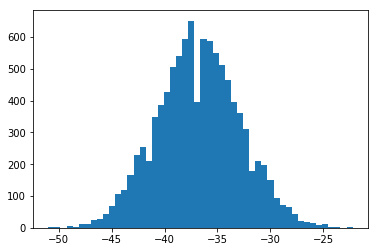

In [68]:
plt.hist(samples, bins=50)

In [69]:
mean = sum(samples) / len(samples)
std_dev = pd.Series(samples).std()
print(mean, std_dev)

-36.7851800000001 3.9302265883411334


In [71]:
z_alpha_half = stats.norm.ppf(.975)
top_confidence = mean + (z_alpha_half * std_dev)
bottom_confidence = mean - (z_alpha_half * std_dev)
filtered = [x for x in samples if x < top_confidence and x > bottom_confidence]
len(filtered) / len(samples)

0.9502

### That's a good proof of normality, but if we had to estimate that std dev from the sample itself...

In [88]:
print('actual std dev of distribution', std_dev)

#std_err_nps = 
sample = take_sample(probs_a, 500)
prom = get_promoters(sample)
detr = get_detractors(sample)
x_prom = len(prom[prom == 1])
x_detr = len(detr[detr == 1])
n = len(sample)
coef = 100 / math.sqrt(n * (n - 1))
std_err = coef * math.sqrt(x_prom + x_detr - ((x_prom - x_detr)**2 / n))
print('my estimated std err', std_err)

actual std dev of distribution 3.9302265883411334
my estimated std err 3.8602854307958148


# The goal here is to prove the CLT for NPS

Can we show that if you sample enough times, that the nps score is normally distributed?

In [2]:
nps_a = pd.Series(qnps_answers_a)

promoters_a = get_promoters(nps_a)
detractors_a = get_detractors(nps_a)

print('a stats: ', promoters_a.mean(), promoters_a.var())

def get_nps(arr):
    return 100 * (get_promoters(arr).mean() - get_detractors(arr).mean())


print('REAL NPS : {}'.format(get_nps(nps_a)))

print()
for i in range(10):
    print('sample {}: {}'.format(i, get_nps(pd.Series(np.random.choice(a=nps_a, size=10)))))


REAL NPS : -44.812066076131195

sample 0: -30.0
sample 1: -49.99999999999999
sample 2: -30.0
sample 3: -70.0
sample 4: -50.0
sample 5: -9.999999999999998
sample 6: -40.0
sample 7: -60.0
sample 8: -20.0
sample 9: -70.0


(array([1.000e+00, 5.000e+00, 0.000e+00, 1.600e+01, 2.800e+01, 0.000e+00,
        6.700e+01, 1.130e+02, 0.000e+00, 1.880e+02, 2.990e+02, 0.000e+00,
        4.110e+02, 0.000e+00, 5.560e+02, 7.520e+02, 0.000e+00, 8.670e+02,
        9.100e+02, 0.000e+00, 8.880e+02, 1.007e+03, 0.000e+00, 8.840e+02,
        0.000e+00, 7.230e+02, 6.030e+02, 0.000e+00, 5.200e+02, 3.560e+02,
        0.000e+00, 2.900e+02, 1.930e+02, 0.000e+00, 1.230e+02, 8.800e+01,
        0.000e+00, 5.800e+01, 0.000e+00, 2.300e+01, 1.500e+01, 0.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00]),
 array([-92.85714286, -90.57142857, -88.28571429, -86.        ,
        -83.71428571, -81.42857143, -79.14285714, -76.85714286,
        -74.57142857, -72.28571429, -70.        , -67.71428571,
        -65.42857143, -63.14285714, -60.85714286, -58.57142857,
        -56.28571429, -54.        , -51.71428571, -49.42857143,
        -47.14285714, -44.85714286, -42.57142857, -40.28

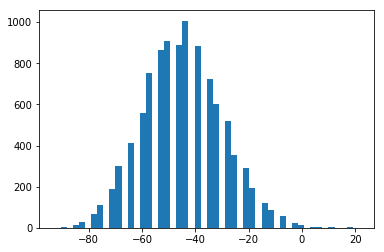

In [88]:
def sample():
    return get_nps(pd.Series(np.random.choice(a=nps_a, size=28)))

samples = [
    sample()
    for x in range(10000)
]

plt.hist(samples, bins=50)

## Now that looks like a bell curve which is nice and all, but the real goal is to make it a normal distribution, so

$$ NPS \sim \mathcal{N}(\mu, \, \frac{\sigma}{\sqrt{N}}) $$


Remember, mu=-44.812066076131195


(array([1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        1.600e+01, 0.000e+00, 0.000e+00, 2.800e+01, 0.000e+00, 0.000e+00,
        6.700e+01, 0.000e+00, 0.000e+00, 1.130e+02, 0.000e+00, 0.000e+00,
        1.880e+02, 0.000e+00, 0.000e+00, 2.990e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 4.110e+02, 0.000e+00, 0.000e+00, 5.560e+02, 0.000e+00,
        0.000e+00, 7.520e+02, 0.000e+00, 0.000e+00, 8.670e+02, 0.000e+00,
        0.000e+00, 9.100e+02, 0.000e+00, 0.000e+00, 8.880e+02, 0.000e+00,
        0.000e+00, 1.007e+03, 0.000e+00, 0.000e+00, 8.840e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 7.230e+02, 0.000e+00, 0.000e+00, 6.030e+02,
        0.000e+00, 0.000e+00, 5.200e+02, 0.000e+00, 0.000e+00, 3.560e+02,
        0.000e+00, 0.000e+00, 2.900e+02, 0.000e+00, 0.000e+00, 1.930e+02,
        0.000e+00, 0.000e+00, 1.230e+02, 0.000e+00, 0.000e+00, 8.800e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 5.800e+01, 0.000e+00, 0.000e+00,
        2.300e+01, 0.000e+00, 0.000e+0

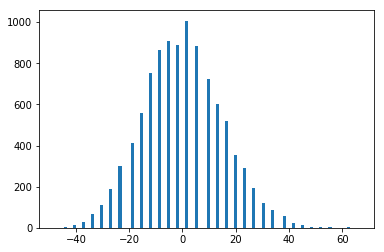

In [89]:
real_nps = get_nps(nps_a)
print('Remember, mu={}'.format(real_nps))

plt.hist([(x - real_nps) for x in samples], bins=100)

### Phew, at least that's centered around 0, but what about the weird standard error, 
We need to get the actual z  distribution, subtract real_nps, and divide by 

$$ \frac{\sigma}{\sqrt{N}} $$

Which is...

$$ \sqrt {\frac{Variance(NPS)} {N}} $$

In [90]:
import math

n = 10
variance_nps = sum([(x - real_nps)**2 for x in samples]) / len(samples)
variance_nps
std_err = math.sqrt(variance_nps / 10)
std_err

4.725377684924763

(array([1.000e+00, 5.000e+00, 0.000e+00, 1.600e+01, 2.800e+01, 0.000e+00,
        6.700e+01, 1.130e+02, 0.000e+00, 1.880e+02, 2.990e+02, 0.000e+00,
        4.110e+02, 0.000e+00, 5.560e+02, 7.520e+02, 0.000e+00, 8.670e+02,
        9.100e+02, 0.000e+00, 8.880e+02, 1.007e+03, 0.000e+00, 8.840e+02,
        6.300e+01, 6.600e+02, 6.030e+02, 0.000e+00, 5.200e+02, 3.560e+02,
        0.000e+00, 2.900e+02, 1.930e+02, 0.000e+00, 1.230e+02, 8.800e+01,
        0.000e+00, 5.800e+01, 0.000e+00, 2.300e+01, 1.500e+01, 0.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00]),
 array([-1.01674575e+01, -9.68374711e+00, -9.20003672e+00, -8.71632633e+00,
        -8.23261594e+00, -7.74890555e+00, -7.26519516e+00, -6.78148477e+00,
        -6.29777437e+00, -5.81406398e+00, -5.33035359e+00, -4.84664320e+00,
        -4.36293281e+00, -3.87922242e+00, -3.39551203e+00, -2.91180164e+00,
        -2.42809125e+00, -1.94438086e+00, -1.46067047e+00, -9.76960078e-

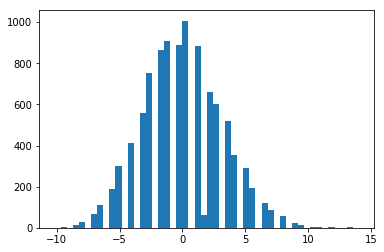

In [91]:
normal_samples = [((x - real_nps) / std_err) for x in samples]

plt.hist(normal_samples, bins=50)

### Seems pretty Normally, distributed, but let's find:

$$ Z_\frac{{\alpha}}{2}$$

And make sure that 95% of stuff is less than it

In [92]:
z_alpha_half = 1.9599639861
confidence = z_alpha_half * std_err
confidence

9.261570083173128

In [94]:
centered_samps = [(x - real_nps) for x in samples]
filtered = [x for x in centered_samps if x < (real_nps + confidence) and x > (real_nps - confidence) ]

In [95]:
len(filtered) / len(samples)

0.005

### No, dummy, I need to divide it by the standard error: 

$$ Standard Error (\sigma_{m}) = \frac{\sigma}{\sqrt{N}}$$
which is the standard deviation over the square root of N, the standard deviation is the square root of the variance and that comes from the cool NPS variance formula

$$ \sigma = \sqrt{Variance(NPS)} $$


$$ Variance(NPS) = Var(Promoters) + Var(Detractors) + 2 * Covar(P, D)  $$

In [100]:
# So let's get the sqrt of the real_nps's variance 

p_det = len(detractors_a[detractors_a==1]) / len(detractors_a)
p_prom  = len(promoters_a[promoters_a==1]) / len(promoters_a)
passives_a = get_passives(nps_a)
p_pass = len(passives_a[passives_a==1]) / len(passives_a)
#variance_nps = (p_prom * (1 - p_prom)) + (p_det * (1 - p_det)) + (2 * p_prom * p_det)
variance_nps = ((100 - real_nps) * p_prom)**2 + ((0 - real_nps)**2 * p_pass) + ((-100 - real_nps) * p_det)**2
std_err = math.sqrt(variance_nps / 28)

print(variance_nps, math.sqrt(variance_nps), std_err)

2290.870282678793 47.86303670557054 9.045263722521135


(array([1.000e+00, 5.000e+00, 0.000e+00, 1.600e+01, 2.800e+01, 0.000e+00,
        6.700e+01, 1.130e+02, 0.000e+00, 1.880e+02, 2.990e+02, 0.000e+00,
        4.110e+02, 0.000e+00, 5.560e+02, 7.520e+02, 0.000e+00, 8.670e+02,
        9.100e+02, 0.000e+00, 8.880e+02, 1.007e+03, 0.000e+00, 8.840e+02,
        1.150e+02, 6.080e+02, 6.030e+02, 0.000e+00, 5.200e+02, 3.560e+02,
        0.000e+00, 2.900e+02, 1.930e+02, 0.000e+00, 1.230e+02, 8.800e+01,
        0.000e+00, 5.800e+01, 0.000e+00, 2.300e+01, 1.500e+01, 0.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00]),
 array([-5.31162808e+00, -5.05893072e+00, -4.80623336e+00, -4.55353599e+00,
        -4.30083863e+00, -4.04814127e+00, -3.79544391e+00, -3.54274654e+00,
        -3.29004918e+00, -3.03735182e+00, -2.78465446e+00, -2.53195709e+00,
        -2.27925973e+00, -2.02656237e+00, -1.77386501e+00, -1.52116764e+00,
        -1.26847028e+00, -1.01577292e+00, -7.63075555e-01, -5.10378193e-

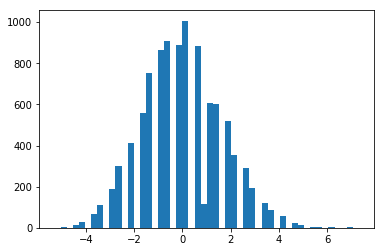

In [101]:
normal_samples = [((x - real_nps) / std_err) for x in samples]
plt.hist(normal_samples, bins=50)

In [102]:
z_alpha_half = 1.9599639861
confidence = z_alpha_half * std_err
top = real_nps + confidence
bottom = real_nps - confidence
print('confidence : ', confidence)

filtered = [x for x in samples if x < top and x > bottom ]
len(filtered) / len(samples)

confidence :  17.728391140918248


0.771

In [103]:
z_alpha_half = stats.norm.ppf(.95)
conf_one_side = real_nps + (z_alpha_half * std_err)
filtered = [x for x in samples if x < conf_one_side]
len(filtered) / len(samples)


0.8318